# Biodiversity Data Analysis Project

# Project overview
- The goal of this project is to analyze biodiversity data observed at various national park sites.
- This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.
- It was found that bird and mammal species are likely to become endangered
- It was also found that Yellowstone National Park has good biodiversity.
- The libraries used were matplotlib, scipy, pandas, and numpy.

## Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?
- How is the distribution of conservation status in birds?
- How is the distribution of conservation status in birds of prey?
- How is the distribution of birds of prey in each national park?

## Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks 

## Import modules
Import modules that will be used in this project::
- `from matplotlib import pyplot as plt`
- `from scipy.stats import chi2_contingency`
- `import pandas as pd`
- `import numpy as np`

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

## Load dataset
The data used consisted of two CSV files. `species_info.csv` with data on various species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

`observations.csv` with data on species observation and National Park locations, including:
- The scientific name of each species
- The National Park name
- The number of observation

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Data cleaning
After checking both csv files, there is a `NaN` value in the `conservation_status` column that needs to be replaced to make it easier to understand.  

In [4]:
species.fillna('No Intervention', inplace = True)

Let's check again, to make sure the `conservation_status` column is is appropriate for analysis.

In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


## Data understanding
Let's start by learning more about data by answering some simple questions as follows:

How the `species` data structure?

In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


How the `observations` data structure?

In [7]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


How many different species are in the `species` DataFrame?

In [8]:
print(f'Number of species: {species.scientific_name.nunique()}')

Number of species: 5541


What are the different values of `category` in `species`?

In [9]:
print(f'Number of category: {species.category.nunique()}')
print(f'Category: {species.category.unique()}')

Number of category: 7
Category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [10]:
print(f'Conservation status: {species.conservation_status.unique()}')

Conservation status: ['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


What are the different values of `park_name`?

In [11]:
print(f'Number of National Park: {observations.park_name.nunique()}')
print(f'National Park: {observations.park_name.unique()}')

Number of National Park: 4
National Park: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


## Analysis

## The distribution of conservation status
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.

In [12]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name', ascending = False)
protection_counts

,conservation_status,scientific_name
2,No Intervention,5363
3,Species of Concern,151
0,Endangered,15
4,Threatened,10
1,In Recovery,4


Now let's create a bar chart to display the results in a visual form!

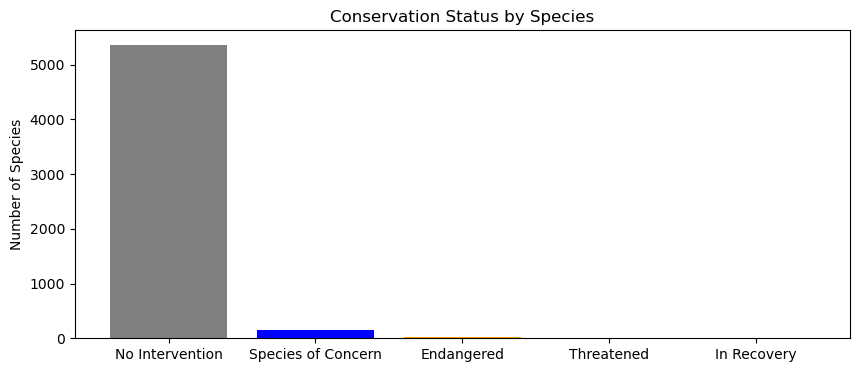

In [13]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts['scientific_name'].values, color=['gray','blue','orange','yellow','green'])
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(['No Intervention','Species of Concern','Endangered','Threatened','In Recovery'])
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')

plt.show()

This bar chart may be correct, but the conservation status of `Species of Concern`,`Endangered`,`Threatened`,`In Recovery` is not clearly visible. We will filter and create a new DataFrame without the `No Intervention`. After that, let's recreate the bar chart with a new DataFrame.

In [14]:
filtered_protection_counts = protection_counts[protection_counts['conservation_status'].str.contains('No Intervention') == False]

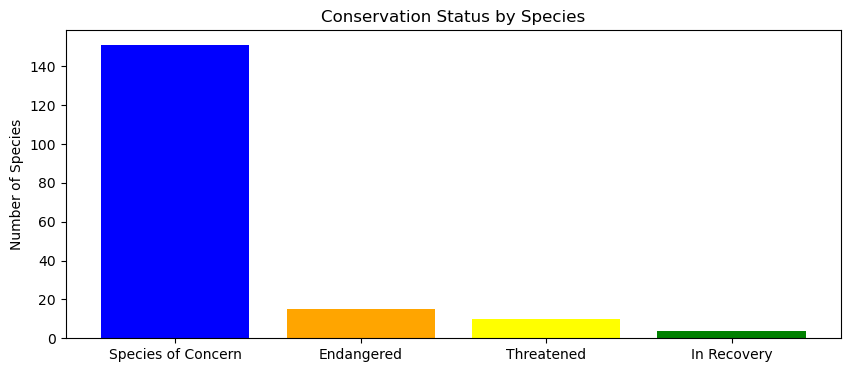

In [15]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(filtered_protection_counts)), filtered_protection_counts['scientific_name'].values, color=['blue','orange','yellow','green'])
ax.set_xticks(range(len(filtered_protection_counts)))
ax.set_xticklabels(['Species of Concern','Endangered','Threatened','In Recovery'])
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')

plt.show()

We can see that there are 151 `Species of Concern`. In addition, there are 15 species categorized as `Endangered` and 10 species categorized as `Threatened`.

## Certain types of species that are endangered
Are certain types of species more likely to be endangered?

To answer the question above, let's create a new column in `species` called `is_protected`. Useful for categorizing which species are protected or not.

In [16]:
species['is_protected'] = species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

In [17]:
category_counts = species.groupby(['category','is_protected']).scientific_name.nunique().reset_index()
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


By using pivots, it will be easier to see this data.

In [18]:
category_pivot = category_counts.pivot(index='category', columns='is_protected', values='scientific_name').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


It seems that this pivot doesn't explain the data content, let's rename the `True` column to `protected` and `False` to `not_protected`. 

In [19]:
category_pivot.columns = ['category','not_protected','protected']
category_pivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Let's create a new column called `percent_protected`, to find the percentage of species that are protected.

In [20]:
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected) * 100
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


As we can see, species in category `Mammal` are potentially endangered than species in `Bird`.

## Statistical significant

Let's do a significance test to see if the statement that `Mammal` species are more potentially endangered than `Bird` is true.

The significance test used is *chi squared*. Before performing the *chi squared test*, we need to create a contingency table that will look like this:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

In [21]:
contingency = [[30, 146],
              [75,413]]

chi2, pval, dof, expected = chi2_contingency(contingency)
print(f'p-value: {pval}')

p-value: 0.6875948096661336


It looks like this difference isn't significant! So, the statement that `Mammal` species are more likely to be endangered than `Bird` is not true.

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [22]:
contingency = [[5, 73],
              [30,146]]

chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.03835559022969898


Based on the p-value, there seems to be a significant difference between `Reptile` and `Mammal`!

So, we can say that `Mammal` are more likely to be endangered than `Reptiles`.

## Species distribution in national parks

To find out the number of species and their distribution, it is necessary to merge the data between `species_info.csv` and `observations.csv`.

In [23]:
spesies_observation_merged = observations.merge(species)
spesies_observation_merged.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False


Now that we've merged the data, let's find out how many animals were observed. Before that is done, it is necessary to filter the data that only shows animals.

In [24]:
animal_observation = spesies_observation_merged[spesies_observation_merged['category'].str.contains('Vascular Plant|Nonvascular Plant') == False]

In [25]:
n_observations = animal_observation.observations.values.sum()
print(f'Number of species observed: {n_observations}')

Number of species observed: 659282


A total of 659282 species were observed in four different national parks. Let's see how many species were observed by `category`

In [26]:
n_species = animal_observation.groupby('category').observations.sum().reset_index().sort_values(by='observations', ascending = False)
n_species

,category,observations
1,Bird,332371
3,Mammal,163120
2,Fish,72901
4,Reptile,45822
0,Amphibian,45068


The most observed animal groups were birds, mammals, fish, and amphibians.

Because the four National Parks are primarily terrestrial, aquatic and semi-aquatic animal species such as fish and amphibians are less common. It is necessary to see which National Parks are inhabited by aquatic, semi-aquatic and terrestrial species and the distribution of each species category. 

In [27]:
species_distribution = animal_observation.groupby(['category', 'park_name']).observations.sum().reset_index().sort_values(by='observations', ascending = False)
species_distribution

,category,park_name,observations
6,Bird,Yellowstone National Park,144300
7,Bird,Yosemite National Park,86612
14,Mammal,Yellowstone National Park,70701
4,Bird,Bryce National Park,58590
5,Bird,Great Smoky Mountains National Park,42869
15,Mammal,Yosemite National Park,42533
10,Fish,Yellowstone National Park,31459
12,Mammal,Bryce National Park,28830
13,Mammal,Great Smoky Mountains National Park,21056
18,Reptile,Yellowstone National Park,20061


It seems like it would be easier to understand this data if using `pivot`.

In [28]:
pivot_species_distribution = species_distribution.pivot(index = 'park_name', columns = 'category', values = 'observations').reset_index()
pivot_species_distribution

category,park_name,Amphibian,Bird,Fish,Mammal,Reptile
0,Bryce National Park,7542,58590,12823,28830,8141
1,Great Smoky Mountains National Park,5876,42869,9482,21056,5841
2,Yellowstone National Park,19937,144300,31459,70701,20061
3,Yosemite National Park,11713,86612,19137,42533,11779


Let's create a stacked bar to make it clearer

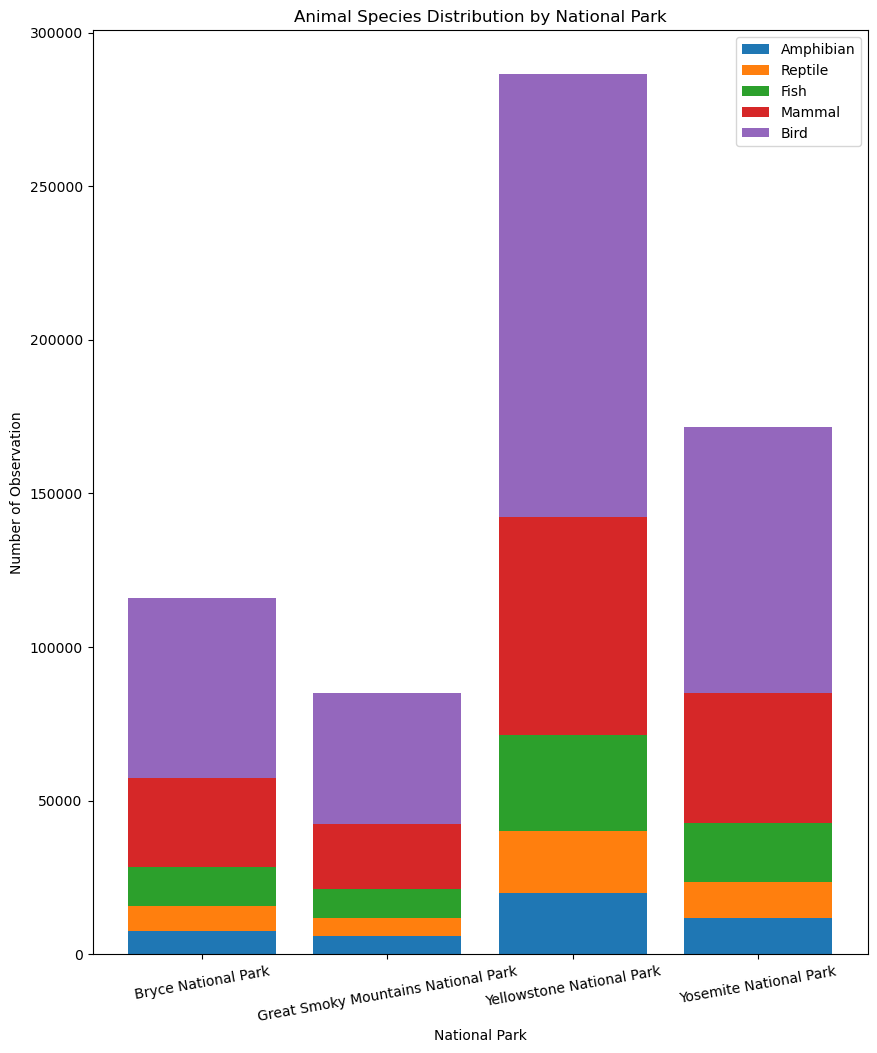

In [29]:
# Create a new variable
a = pivot_species_distribution['Amphibian'].values
b = pivot_species_distribution['Bird'].values
f = pivot_species_distribution['Fish'].values
m = pivot_species_distribution['Mammal'].values
r = pivot_species_distribution['Reptile'].values

# X axis
x = range(len(pivot_species_distribution))

# Create a bottom of bar
f_bottom = np.add(a,r)
m_bottom = np.add(f_bottom,f)
b_bottom = np.add(m_bottom,m)

# Plot
plt.figure(figsize=(10,12))
plt.bar(x,a)
plt.bar(x,r,bottom=a)
plt.bar(x,f,bottom=f_bottom)
plt.bar(x,m,bottom=m_bottom)
plt.bar(x,b,bottom=b_bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(['Bryce National Park','Great Smoky Mountains National Park','Yellowstone National Park','Yosemite National Park'], rotation = 10)
plt.title('Animal Species Distribution by National Park')
plt.xlabel('National Park')
plt.ylabel('Number of Observation')
plt.legend(['Amphibian','Reptile','Fish','Mammal','Bird'])
plt.savefig('Animal Species Distribution by National Park.png')

plt.show()

Various terrestrial, aquatic, and semi-aquatic animals inhabit Yellowstone National Park. This finding indicates that Yellowstone National Park has good biodiversity, especially animals.

Birds are the most commonly observed animals. Let's learn more about birds by answering the following questions:

- How is the distribution of conservation status in birds?
- How is the distribution of conservation status in birds of prey?
- How is the distribution of birds of prey in each national park?

First, we need to filter the data frame so that it only shows the bird species and knows how many there are.

In [30]:
bird = animal_observation[animal_observation['category'] == 'Bird']
c_bird = bird['common_names'].nunique()
n_bird = bird['observations'].sum()
print(f'Number of birds species: {c_bird}')
print(f'Number of birds observed: {n_bird}')
bird.head()

Number of birds species: 481
Number of birds observed: 332371


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,No Intervention,False
25,Spizella pusilla,Yosemite National Park,148,Bird,Field Sparrow,No Intervention,False
26,Spizella pusilla,Bryce National Park,92,Bird,Field Sparrow,No Intervention,False
27,Spizella pusilla,Great Smoky Mountains National Park,72,Bird,Field Sparrow,No Intervention,False
44,Cistothorus platensis,Bryce National Park,114,Bird,Sedge Wren,No Intervention,False


Let's find out how the conservation status is distributed.

In [31]:
bird_status = bird.groupby('conservation_status').common_names.nunique().reset_index()
bird_status

,conservation_status,common_names
0,Endangered,4
1,In Recovery,3
2,No Intervention,407
3,Species of Concern,72


We can see here that there are four `Endangered` bird species and 72 `Species of Concern`.  

Birds of prey, which play an important role in the ecosystem, are interesting to know whether they are `Endangered` or not. We need to filter the dataframe to show only birds of prey.

In [32]:
bird_of_prey = bird[bird['common_names'].str.contains('Falcon|Hawk|Osprey|Owl') == True]
birdprey_status = bird_of_prey.groupby('conservation_status').common_names.nunique().reset_index()
birdprey_status

,conservation_status,common_names
0,In Recovery,1
1,No Intervention,23
2,Species of Concern,10


It turns out that there are no `Endangered` birds of prey, but rather 10 `Species of Concern` and 1 species `In Recovery`. Let's find out the list of birds of prey `Species of Concern`.

In [33]:
species_of_concern = bird_of_prey[bird_of_prey['conservation_status'] == 'Species of Concern']
print(f'List species of concern: {species_of_concern.common_names.unique()}')

List species of concern: ["Cooper's Hawk" 'Osprey' 'Osprey, Western Osprey' 'Long-Eared Owl'
 'Red-Shouldered Hawk' 'Prairie Falcon' 'Short-Eared Owl'
 'Peregrine Falcon' 'Rough-Legged Hawk' 'Sharp-Shinned Hawk']


Finally, what is the distribution of birds of prey in each national park? Are there certain national parks that are heavily populated by birds of prey?

In [34]:
bird_op_distribution = bird_of_prey.groupby('park_name').observations.sum().reset_index()
bird_op_distribution

,park_name,observations
0,Bryce National Park,4527
1,Great Smoky Mountains National Park,3346
2,Yellowstone National Park,11130
3,Yosemite National Park,6537


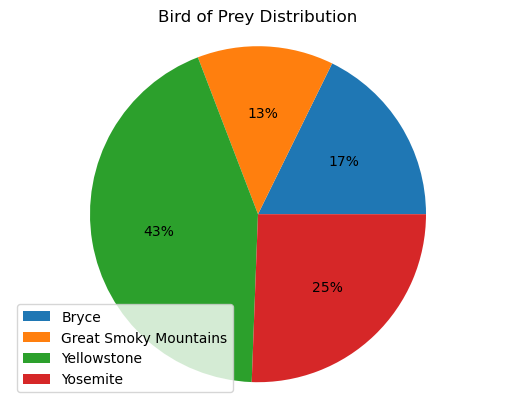

In [35]:
plt.pie(bird_op_distribution['observations'].values, autopct='%ld%%')
plt.legend(['Bryce','Great Smoky Mountains','Yellowstone','Yosemite'], loc=3)
plt.axis('equal')
plt.title('Bird of Prey Distribution')
plt.savefig('Bird of Prey Distribution.png')

plt.show()

We can see that birds of prey are most common in `Yellowstone National Park`. 

## Conclusion

This project has analyzed data on plant and vertebrate biodiversity in four National Parks in the United States: Bryce National Park, Great Smoky Mountains National Park, Yellowstone National Park, and Yosemite National Park. Some of the conclusions that can be obtained from answering the questions at the beginning are as follows:

 - What is the distribution of conservation status for species?
    - Most are `Species of Concern`, but a valuable finding is that of the 25 threatened species, 15 are `Endangered`. 
- Are certain types of species more likely to be endangered?
    - Species in the mammal and bird categories are more likely to be `Endangered`.
- Are the differences between species and their conservation status significant?
    - Based on statistical tests, birds and reptiles are significantly different, so birds are more likely to be `Endangered`.
- Which animal is most prevalent and what is their distribution amongst parks?
    - The bird category is the most prevalent animal. The distribution of animals is quite varied, with `Yellowstone National Park` being the most abundant.
- How is the distribution of conservation status in birds?
    - Many birds are still not protected. There are 79 birds with `Protected` status, 4 of which are `Endangered`.
- How is the distribution of conservation status in birds of prey?
    - No birds of prey are classified as `Endangered`. There are 11 protected species and 23 unprotected species.
- How is the distribution of birds of prey in each national park?
    - Birds of prey are most common in `Yellowstone National Park`.